## Decision Trees and Ensemble Learning

Credit risk scoring project. Decision Tree

Dataset : https://github.com/gastonstat/CreditScoring 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [3]:
!wget $data

--2025-11-08 14:25:14--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.1’

CreditScoring.csv.1 100%[===================>] 178.21K  --.-KB/s    in 0.004s  

2025-11-08 14:25:14 (43.4 MB/s) - ‘CreditScoring.csv.1’ saved [182489/182489]



In [4]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [6]:
df = pd.read_csv(data)
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [9]:
status_values = {
    1: 'ok',
    2: 'default',
    0: ''
}

df.status = df.status.map(status_values)

In [10]:
df.head(3)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985


In [11]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [12]:
df.head(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [13]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [14]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [15]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [16]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [17]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [18]:
df_train.head(3)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
2815,default,3,rent,36,61,married,no,fixed,41,57.0,12000.0,0.0,2500,3559
1461,default,5,rent,48,30,separated,yes,partime,39,41.0,0.0,0.0,1300,1600
2935,ok,15,owner,60,32,divorced,no,freelance,35,0.0,6000.0,3300.0,1550,1612


In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Prepare target variable status by converting it from categorical to binary, where 0 represents ok and 1 represents default.

In [20]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

Delete the target variable from the train/val/test dataframe.

In [21]:

del df_train['status']
del df_val['status']
del df_test['status']

In [22]:
df_train.head(3)

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,3,rent,36,61,married,no,fixed,41,57.0,12000.0,0.0,2500,3559
1,5,rent,48,30,separated,yes,partime,39,41.0,0.0,0.0,1300,1600
2,15,owner,60,32,divorced,no,freelance,35,0.0,6000.0,3300.0,1550,1612


Decision trees

In [23]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [24]:
xi = df_train.iloc[0].to_dict()

In [25]:
assess_risk(xi)

'ok'

Decision Trees are powerful algorithms, capable of fitting complex datasets. The decision trees make predictions based on the bunch of *if/else* statements by splitting a node into two or more sub-nodes.

With versatility, the decision tree is also prone to overfitting. One of the reasons why this algorithm often overfits is its depth. It tends to memorize all the patterns in the train data but struggles to perform well on the unseen data (validation or test set).

To overcome the overfitting problem, we can reduce the complexity of the algorithm by reducing the depth size.

A decision tree with a depth of 1 is called `decision stump` and has only one split from the root.

**Classes, functions, and methods**:

- `DecisionTreeClassifier`: classification model from `sklearn.tree` class.
- `max_depth`: hyperparameter to control the maximum depth of decision tree algorithm.
- `export_text`: method from `sklearn.tree` class to display the text report showing the rules of a decision tree.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [27]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [28]:
train_dicts[:1]

[{'seniority': 3,
  'home': 'rent',
  'time': 36,
  'age': 61,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 41,
  'income': 57.0,
  'assets': 12000.0,
  'debt': 0.0,
  'amount': 2500,
  'price': 3559}]

In [29]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [30]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'marital=divorced', 'marital=married',
       'marital=separated', 'marital=single', 'marital=unk',
       'marital=widow', 'price', 'records=no', 'records=yes', 'seniority',
       'time'], dtype=object)

In [31]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

on Validation dataset

In [33]:
y_pred = dt.predict_proba(X_val)[:, 1]


In [34]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0.

In [36]:
roc_auc_score(y_val, y_pred)

0.668815436531972

on Train dataset

In [37]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [38]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7660925386129352
val: 0.763427236430611


In [40]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))


|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 73.50
|   |   |   |--- class: 0
|   |   |--- income >  73.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- time <= 27.00
|   |   |   |--- class: 0
|   |   |--- time >  27.00
|   |   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- income <= 50.50
|   |   |   |--- class: 1
|   |   |--- income >  50.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 99.50
|   |   |   |--- class: 1
|   |   |--- income >  99.50
|   |   |   |--- class: 0



In [41]:
print(export_text(dt))

|--- feature_25 <= 0.50
|   |--- feature_16 <= 0.50
|   |   |--- feature_12 <= 73.50
|   |   |   |--- class: 0
|   |   |--- feature_12 >  73.50
|   |   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- feature_27 <= 27.00
|   |   |   |--- class: 0
|   |   |--- feature_27 >  27.00
|   |   |   |--- class: 1
|--- feature_25 >  0.50
|   |--- feature_26 <= 6.50
|   |   |--- feature_12 <= 50.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  50.50
|   |   |   |--- class: 1
|   |--- feature_26 >  6.50
|   |   |--- feature_12 <= 99.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  99.50
|   |   |   |--- class: 0



[Text(0.5, 0.875, 'records=yes <= 0.5\ngini = 0.397\nsamples = 2673\nvalue = [1942.0, 731.0]'),
 Text(0.25, 0.625, 'job=partime <= 0.5\ngini = 0.335\nsamples = 2216\nvalue = [1745, 471]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'income <= 73.5\ngini = 0.284\nsamples = 1993\nvalue = [1651, 342]'),
 Text(0.0625, 0.125, 'gini = 0.474\nsamples = 373\nvalue = [229, 144]'),
 Text(0.1875, 0.125, 'gini = 0.215\nsamples = 1620\nvalue = [1422, 198]'),
 Text(0.375, 0.375, 'time <= 27.0\ngini = 0.488\nsamples = 223\nvalue = [94, 129]'),
 Text(0.3125, 0.125, 'gini = 0.358\nsamples = 30\nvalue = [23, 7]'),
 Text(0.4375, 0.125, 'gini = 0.465\nsamples = 193\nvalue = [71, 122]'),
 Text(0.75, 0.625, 'seniority <= 6.5\ngini = 0.49\nsamples = 457\nvalue = [197, 260]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'income <= 50.5\ngini = 0.423\nsamples = 263\nvalue = [80, 183]'),
 Text(0.5625, 0.125, 'gini = 0.194\nsamples = 55\nvalue = [6, 49]'),
 Text(0.6875, 0.125, 'gini = 0.458\nsample

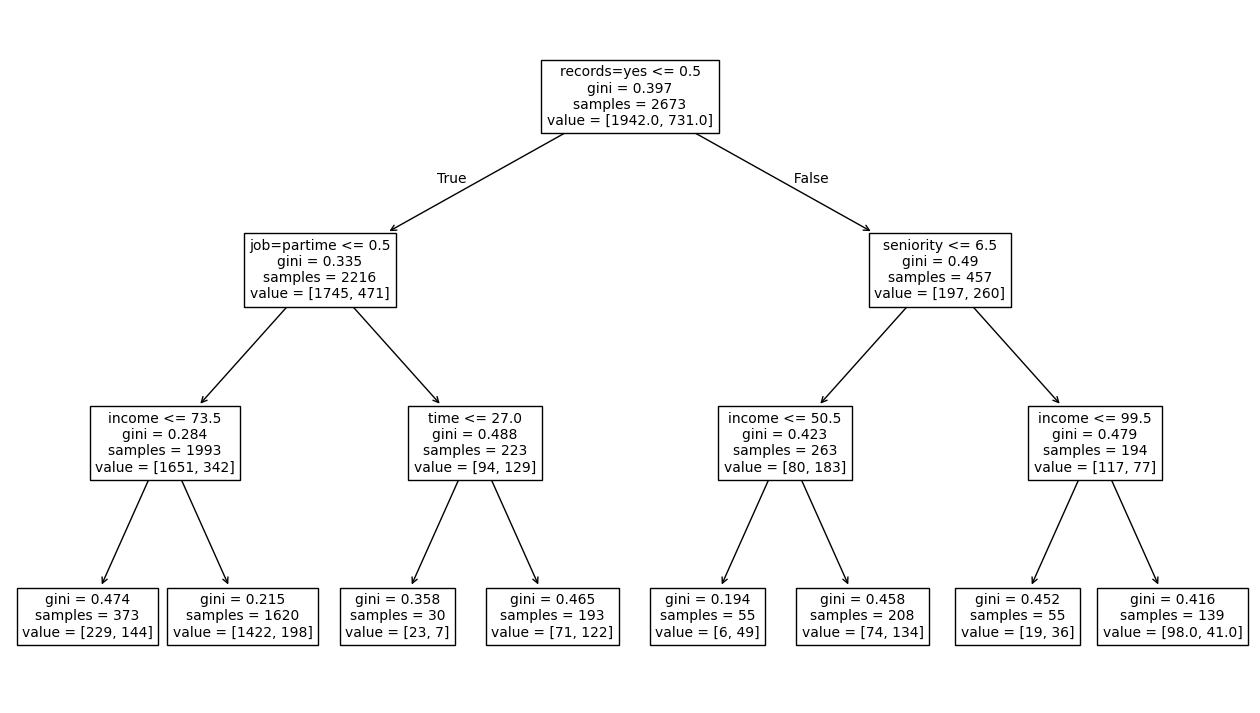

In [42]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 9))
plot_tree(dt, feature_names=dv.get_feature_names_out(), fontsize=10)

6.4 Decision tree learning algorithm
- Finding the best split for one column
- Finding the best split for the entire dataset
- Stopping criteria
- Decision tree learning algorithm

This lesson first reviews the topics learned in the previous lesson about how to train a decision tree using scikit-learn, and handle a decision tree model not generalizing well due to overfitting of the data. 

In this lesson, we learn about how to best split a decision tree and different classification criteria that can be used to split a tree. We dive deep in an example, splitting trees with `misclassification` criteria. Additionally, different stopping criteria to break the iterative tree split are discussed.     

* **Structure of a decision tree**: A decision tree is a data structure 
composed of **nodes** (which contain conditions) and **branches** (which represent the values for a condition: True or False).  The tree starts with a **root node**, which is the parent of two other nodes, and each of these nodes can also be the parent of others. At the last level of the tree, there are terminal nodes, also called **leaves**.

* **Depth of a decision tree**: The **depth** of a tree is the number of levels it has, or simply the length of the longest path from the root node to a leaf node.
  
* **Rules & Conditions, Thresholds**: The learning algorithm for a decision tree involves determining the best **conditions** to split the data at each node in order to achieve the best possible classifier. When there are many **features**, the algorithm considers each feature with its optimized **threshold** to determine the best feature for splitting at a particular node. In essence, at each node, the algorithm evaluates all possible thresholds for every feature and calculates the resulting misclassification rate. It then selects the condition
(feature and threshold) that yields the lowest impurity.

* **Misclassification rate**: After each split, the goal is to divide the data into two sets that are as **pure** as possible. This means that the data within each set should belong predominantly to either one class, or the other. Another way to describe this is to aim for the lowest possible **misclassification rate** (impurity). The misclassification rate is a weighted average of the error rates obtained after splitting the data into two sets.  The predicted class for each set is determined by the **majority class** present in this set.

* **Impurity criteria**: Common misclassification rate measurements are **GINI Impurity** and **Entropy**. It is also possible to use **MSE** for regression problems.
  
* **Decision trees can be used to solve regression problems**: While we focused on decision tree classifiers, it's important to note that decision trees can also be applied to regression problems using decision tree regressors.

* **Stopping Criteria**: The process of recursively splitting the data at each child node eventually stops based on certain **stopping criteria**. These criteria prevent the model from overfitting and include:

    *   The group is already **pure**: 0% impurity.
    *   The **maximum depth** has been reached.
    *   The group is **smaller** than the minimum size set for groups.
    *   The maximum number of **leaves/terminal nodes** has been reached.

#### Decision Tree Learning Algorithm in a Nutshell

*   At a node, find the best split.
*   Stop if max\_depth is reached.
*   For each child node, if the node is sufficiently large and not pure, repeat the process from the beginning.

In [43]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [45]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [46]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [48]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_left.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


In [49]:
from IPython.display import display

In [50]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [51]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [54]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [55]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [56]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


6.5 Decision trees parameter tuning
- selecting max_depth
- selecting min_samples_leaf

In this lesson, we will discuss about different parameters used to control a Decision Tree (DT). Two of them, `max_depth` and `min_samples_leaf` have a greater importance than the others. We will further see how we first tune `max_depth` parameter and then move to tuning other parameters will help. After that, a dataframe will be created with all possible combinations of `max_depth`, `min_sample_leaf` and the auc score corresponding to them. These results will be visualized using a heatmap by pivoting the dataframe to easily determine the best possible `max_depth` and `min_samples_leaf` combination. Finally, the DT will be retrained using the identified parameter combination. The DT so trained will be viewed as a tree diagram, for visualizing decision rules.     

### Steps
* **Fine-Tuning Process:** iterate to find optimal parameter settings.
    *   Start by tuning `max_depth` with various values to determine a subset of optimal
depths.
    *   Then, using this subset, fine-tune the model further by exploring different
`min_samples_leaf` values.

    This method is computationally efficient for **large datasets**, though it may not be optimal for smaller ones.

* **Heatmaps for Visualization:** Store the scores (e.g., AUC) obtained during tuning in a pivot table, and create a heatmap with `seaborn` to easily identify high score areas, which helps pinpoint the optimal `max_depth` and `min_samples_leaf` combination.

**NB:** Choose parameter values that effectively control the tree's size and avoid values like 'nan' (Not a Number), even if they seem to lead to better scores.

### Importance of  `max_depth` and `min_samples_leaf`

*   **Controlling Overfitting:** these parameters play a critical role in preventing overfitting.
    *   `max_depth` limits the tree's complexity, preventing it from growing too deep and memorizing the training data.
    *   `min_samples_leaf` ensures that leaf nodes have a sufficient number of samples,
reducing the chance of creating nodes that are too specific to the training data.

*   **Impact on Bias and Variance:** They also affect the model's bias and variance.
    *   Increasing `max_depth` and decreasing `min_samples_leaf` can lead to a more complex model with lower bias but higher variance.
    *   Decreasing `max_depth` and increasing `min_samples_leaf` results in a simpler model with higher bias but lower variance.
      
It's then important to find the right balance between `max_depth` and `min_samples_leaf` to achieve optimal model performance.
This involves a trade-off between bias and variance, and the best values depend on the specific dataset and problem.

In [57]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.613
   2 -> 0.688
   3 -> 0.763
   4 -> 0.779
   5 -> 0.783
   6 -> 0.780
  10 -> 0.698
  15 -> 0.673
  20 -> 0.661
None -> 0.662


In [60]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        print('%4s, %3d -> %.3f' % (depth, s, auc))
        scores.append((depth, s, auc))

   4,   1 -> 0.779
   4,   5 -> 0.779
   4,  10 -> 0.774
   4,  15 -> 0.771
   4,  20 -> 0.784
   4, 500 -> 0.671
   4, 100 -> 0.767
   4, 200 -> 0.765
   5,   1 -> 0.783
   5,   5 -> 0.787
   5,  10 -> 0.784
   5,  15 -> 0.780
   5,  20 -> 0.785
   5, 500 -> 0.671
   5, 100 -> 0.786
   5, 200 -> 0.778
   6,   1 -> 0.775
   6,   5 -> 0.785
   6,  10 -> 0.792
   6,  15 -> 0.795
   6,  20 -> 0.802
   6, 500 -> 0.671
   6, 100 -> 0.793
   6, 200 -> 0.789


In [61]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.779339
1,4,5,0.778715
2,4,10,0.773832
3,4,15,0.770702
4,4,20,0.783517


In [64]:
df_scores.sort_values('auc', ascending=False).head(2)

,max_depth,min_samples_leaf,auc
20,6,20,0.801787
19,6,15,0.794948


In [67]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.779  0.783  0.775
5                 0.779  0.787  0.785
10                0.774  0.784  0.792
15                0.771  0.780  0.795
20                0.784  0.785  0.802
100               0.767  0.786  0.793
200               0.765  0.778  0.789
500               0.671  0.671  0.671

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

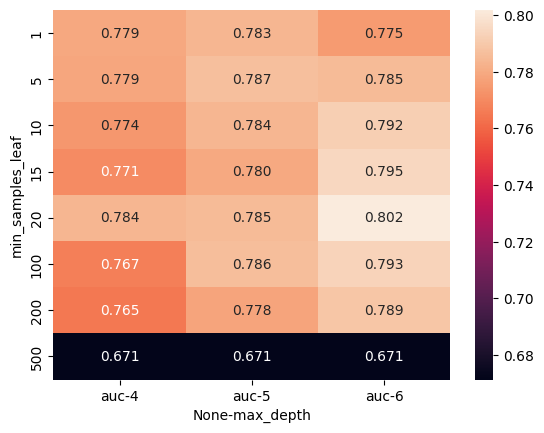

In [68]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [69]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [70]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- income <= 50.50
|   |   |   |--- amount <= 1275.00
|   |   |   |   |--- class: 1
|   |   |   |--- amount >  1275.00
|   |   |   |   |--- class: 1
|   |   |--- income >  50.50
|   |   |   |--- assets <= 8250.00
|   |   |   |   |--- amount <= 662.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amount >  662.50
|   |   |   |   |   |--- expenses <= 83.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- expenses >  83.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  8250.00
|   |   |   |   |--- class: 0
|   |--- seniority >  6.50
|   |   |--- income <= 99.50
|   |   |   |--- assets <= 3750.00
|   |   |   |   |--- class: 1
|   |   |   |--- assets >  3750.00
|   |   |   |   |--- class: 0
|   |   |--- income >  99.50
|   |   |   |--- seniority <= 11.50
|   |   |   |   |--- amount <= 1050.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amount >  1050.00
|   |   |   |   |   |--- c

[Text(0.45905172413793105, 0.9285714285714286, 'records=no <= 0.5\ngini = 0.397\nsamples = 2673\nvalue = [1942.0, 731.0]'),
 Text(0.14439655172413793, 0.7857142857142857, 'seniority <= 6.5\ngini = 0.49\nsamples = 457\nvalue = [197, 260]'),
 Text(0.3017241379310345, 0.8571428571428572, 'True  '),
 Text(0.06896551724137931, 0.6428571428571429, 'income <= 50.5\ngini = 0.423\nsamples = 263\nvalue = [80, 183]'),
 Text(0.034482758620689655, 0.5, 'amount <= 1275.0\ngini = 0.194\nsamples = 55\nvalue = [6, 49]'),
 Text(0.017241379310344827, 0.35714285714285715, 'gini = 0.285\nsamples = 29\nvalue = [5, 24]'),
 Text(0.05172413793103448, 0.35714285714285715, 'gini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.10344827586206896, 0.5, 'assets <= 8250.0\ngini = 0.458\nsamples = 208\nvalue = [74, 134]'),
 Text(0.08620689655172414, 0.35714285714285715, 'amount <= 662.5\ngini = 0.427\nsamples = 181\nvalue = [56, 125]'),
 Text(0.06896551724137931, 0.21428571428571427, 'gini = 0.496\nsamples = 35\nval

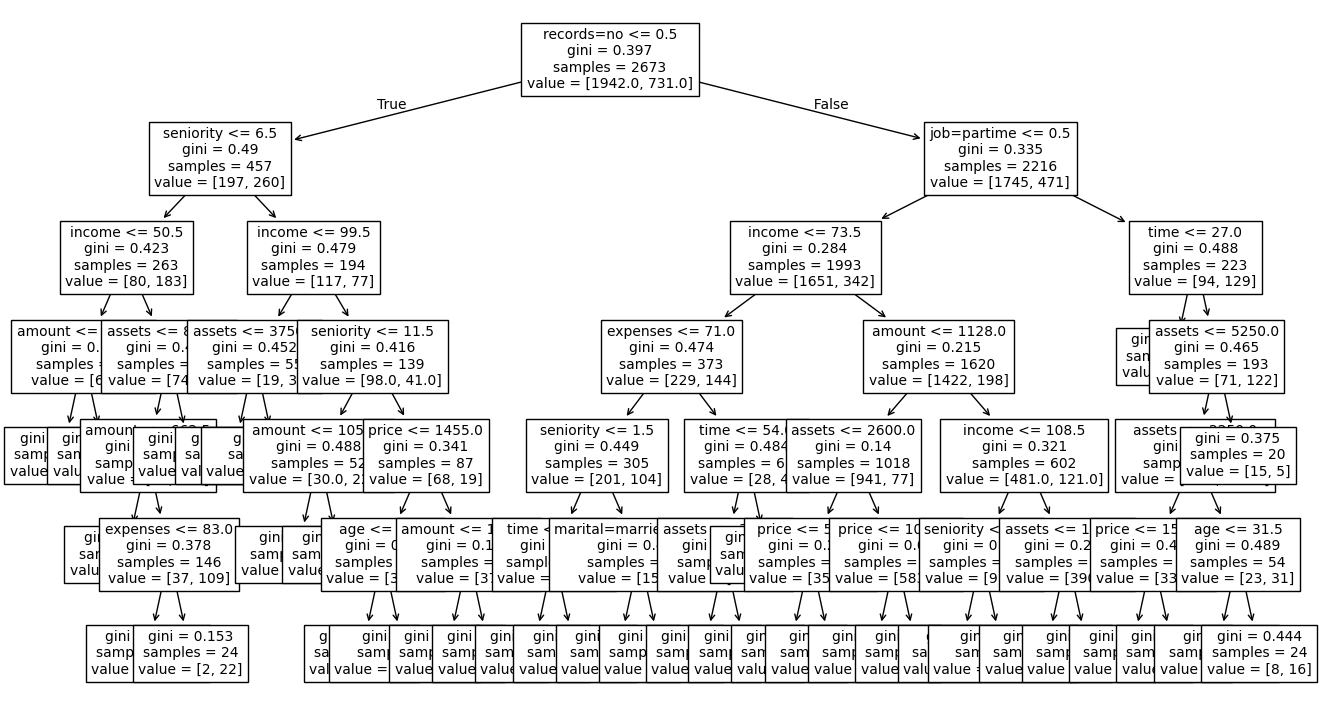

In [71]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 9))
plot_tree(dt, feature_names=dv.get_feature_names_out(), fontsize=10)